## Crop Recommendation Using Machine Learning Project

- Precision agriculture is in trend nowadays. It helps the farmers to get informed decision about the farming strategy. Here, I present you a dataset which would allow the users to build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters.

**About Dataset:**
- This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India.

**Data fields**
- N - ratio of Nitrogen content in soil
- P - ratio of Phosphorous content in soil
- K - ratio of Potassium content in soil
- temperature - temperature in degree Celsius
- humidity - relative humidity in %
- ph - ph value of the soil
- rainfall - rainfall in mm

In [190]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [191]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

In [192]:
crop = pd.read_csv('dataset/Crop_recommendation.csv')
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [193]:
crop.shape

(2200, 8)

In [194]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [195]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [196]:
crop.duplicated().sum()

0

In [197]:
crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [198]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [199]:
crop['label'].unique().size

22

In [200]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [201]:
crop.corr()

C:\Users\Hamza\AppData\Local\Temp\ipykernel_16880\1215994360.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  crop.corr()


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


C:\Users\Hamza\AppData\Local\Temp\ipykernel_16880\1608651434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(crop.corr(), annot=True, cbar=True)


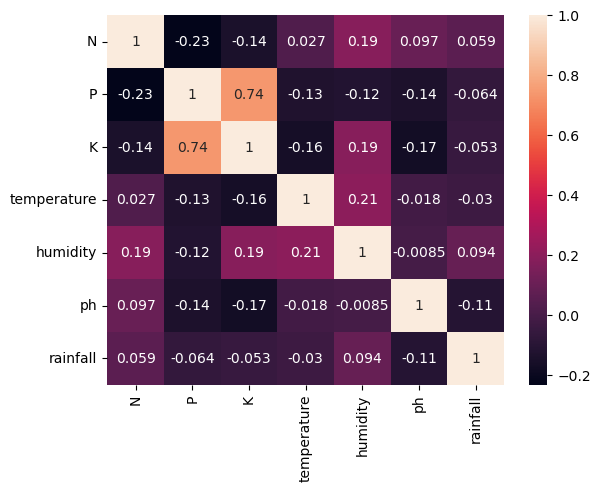

In [202]:
sns.heatmap(crop.corr(), annot=True, cbar=True)
plt.show()

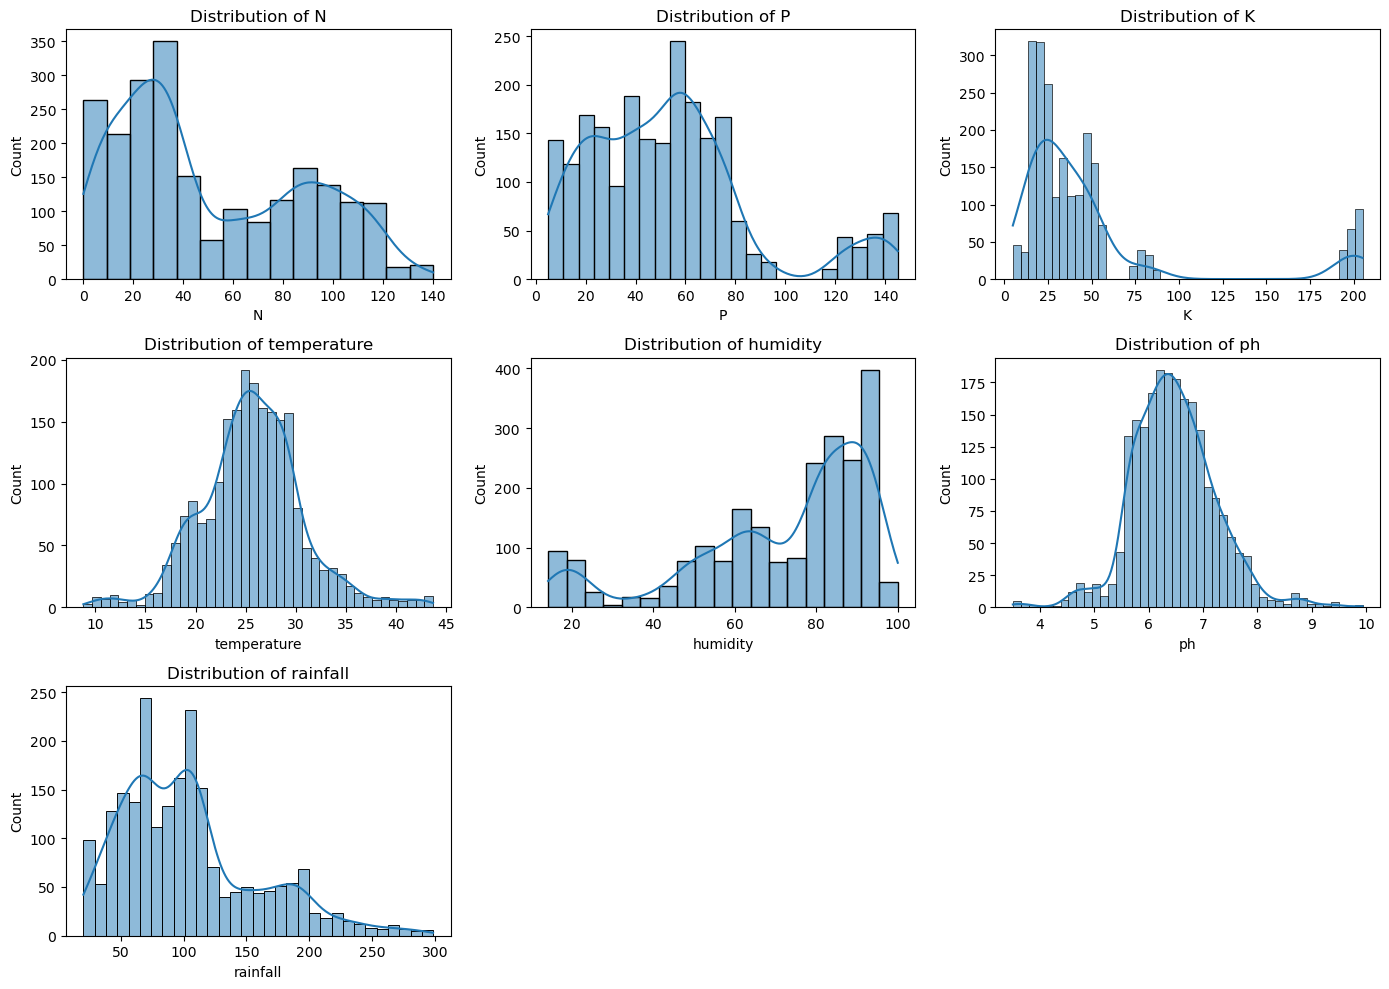

In [203]:
columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Set the size of the figure
plt.figure(figsize=(14, 10))

# Loop through the columns and create a subplot for each
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # Create a 3x3 grid of subplots
    sns.histplot(crop[col], kde=True)  # Plotting the distribution with KDE (Kernel Density Estimation)
    plt.title(f'Distribution of {col}')  # Title for each subplot

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [204]:
crop_dict={
    'rice': 1, 'maize': 2, 'jute': 3, 'cotton': 4, 'coconut': 5,
    'papaya': 6, 'orange': 7, 'apple': 8, 'muskmelon': 9, 'watermelon': 10,
    'grapes': 11, 'mango': 12, 'banana': 13, 'pomegranate': 14,
    'lentil': 15, 'blackgram': 16, 'mungbean': 17, 'mothbeans': 18, 
    'pigeonpeas': 19, 'kidneybeans': 20, 'chickpea': 21, 'coffee': 22
}

crop['label'] = crop['label'].map(crop_dict)

In [205]:
crop.label.unique()

array([ 1,  2, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,
        6,  5,  4,  3, 22], dtype=int64)

In [206]:
crop.label.value_counts()

1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: label, dtype: int64

In [208]:
# splitting Dataset
X = crop.drop('label', axis=1)
y = crop['label']

In [209]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [210]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [211]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

In [212]:
print(f"Shape of X_train data: {X_train.shape}")
print(f"Shape of X_test data: {X_test.shape}")
print(f"Shape of y_train data: {y_train.shape}")
print(f"Shape of y_test data: {y_test.shape}")

Shape of X_train data: (1760, 7)
Shape of X_test data: (440, 7)
Shape of y_train data: (1760,)
Shape of y_test data: (440,)


### Apply MinMaxScaler & StandardScaler on X_train & X_test

In [213]:
#min_max = MinMaxScaler()

#X_train = min_max.fit_transform(X_train)
#X_test = min_max.transform(X_test)

In [214]:
#X_train

In [215]:
#X_test

In [216]:
sc = StandardScaler()

sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [217]:
X_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

In [218]:
X_test

array([[ 1.34934948, -1.0960582 , -0.02225388, ...,  1.05232434,
        -0.37619899, -1.38984486],
       [ 1.26889319, -1.36698971,  0.05607978, ...,  0.67956909,
        -0.28013033, -0.96895253],
       [ 0.22296144,  0.25859933,  0.01691295, ...,  0.98974316,
         0.60209743,  0.22056087],
       ...,
       [ 1.88572474, -0.19295318, -0.62933977, ...,  0.35134079,
         1.61311363, -0.54905776],
       [ 1.75163092, -0.04243567, -0.57058952, ...,  0.1731198 ,
        -0.46741089, -0.64767698],
       [-1.22525175,  0.43922034, -0.55100611, ..., -1.74645651,
        -0.45817577,  0.95946086]])

### Building models

In [219]:
models = {
    'LogisticRegression' : LogisticRegression(),
    'GaussianNB' : GaussianNB(),
    'SVC' : SVC(),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(),
    'ExtraTreeClassifier' : ExtraTreeClassifier(),
    'RandomForestClassifier' : RandomForestClassifier(),
    'BaggingClassifier' : BaggingClassifier(),
    'GradientBoostingClassifier' : GradientBoostingClassifier(),
    'AdaBoostClassifier' : AdaBoostClassifier()
}

In [220]:
# Loop through the models dictionary
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predictions on training set
    y_train_pred = model.predict(X_train)
    train_score = accuracy_score(y_train, y_train_pred)
    print(f"{name} model with accuracy on train data: {train_score}")
    
    # Space for better readability
    print()  
    
    # Predictions on testing set
    y_test_pred = model.predict(X_test)
    test_score = accuracy_score(y_test, y_test_pred)
    print(f"{name} model with accuracy on test data: {test_score}")
    
    # Additional spacing between each model's output
    print("\n" + "-"*50 + "\n")

LogisticRegression model with accuracy on train data: 0.977840909090909

LogisticRegression model with accuracy on test data: 0.9636363636363636

--------------------------------------------------

GaussianNB model with accuracy on train data: 0.9948863636363636

GaussianNB model with accuracy on test data: 0.9954545454545455

--------------------------------------------------

SVC model with accuracy on train data: 0.9880681818181818

SVC model with accuracy on test data: 0.9681818181818181

--------------------------------------------------

KNeighborsClassifier model with accuracy on train data: 0.9869318181818182

KNeighborsClassifier model with accuracy on test data: 0.9590909090909091

--------------------------------------------------

DecisionTreeClassifier model with accuracy on train data: 1.0

DecisionTreeClassifier model with accuracy on test data: 0.9818181818181818

--------------------------------------------------

ExtraTreeClassifier model with accuracy on train data: 

C:\Users\Hamza\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier model with accuracy on train data: 0.19204545454545455

AdaBoostClassifier model with accuracy on test data: 0.1409090909090909

--------------------------------------------------



### Best Model

In [229]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_train_pred = gnb.predict(X_train)
train_score = accuracy_score(y_train, y_train_pred)
print(f"GaussianNB model with accuracy on train data: {train_score}")

y_test_pred = gnb.predict(X_test)
test_score = accuracy_score(y_test, y_test_pred)
print(f"GaussianNB model with accuracy on test data: {test_score}")

GaussianNB model with accuracy on train data: 0.9948863636363636
GaussianNB model with accuracy on test data: 0.9954545454545455


### Save Model

In [230]:
import pickle

pickle.dump(gnb, open('model/gnb_model.pkl', 'wb'))
#pickle.dump(min_max, open('model/minmaxscaler.pkl', 'wb'))
pickle.dump(sc, open('model/standardscaler.pkl', 'wb'))

### Testing Data

In [237]:
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    
    #min_max_features = min_max.fit_transform(features)
    sc_mx_features = sc.fit_transform(features)
    
    prediction = gnb.predict(sc_mx_features).reshape(1,-1)
    
    return prediction[0]

In [238]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [239]:
N = 90
P = 42
K = 43
temperature = 20.879744
humidity = 82.002744
ph = 6.502985
rainfall = 202.935536

predict = recommendation(N, P, K, temperature, humidity, ph, rainfall)

In [240]:
predict

array([3], dtype=int64)